# Data Visualisation Presentation Script
### Author: 199103436

### Part 0: Pre-requisites

In [236]:
# Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
from matplotlib import pyplot as plt

# Miscellanous 
import csv
import os
import datetime

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100
import warnings
warnings.filterwarnings("ignore")

### Part 1: Data description

#### Part 1A: Data collection

In [4]:
# Check current directory
!pwd

/Users/adumitru/Library/CloudStorage/OneDrive-YorkStJohnUniversity/Year 3/Assignments/DataViz


In [147]:
# Change/Ensure current directory is directory with csv data
os.chdir('/Users/adumitru/Library/CloudStorage/OneDrive-YorkStJohnUniversity/Year 3/Assignments/DataViz')
# Load timeseries data for conceptions and abortions by year and age
ts_data = pd.read_csv('ons_data_ts.csv', thousands=',')


#### Part 1B Data description

Year: Field serving as timeseries index.

Age group: Categorical variable for age groups. Range between 'Under 16' to '40 and over'.

Number of conceptions: Aggregated statistics of conception reports. Conception is the act creating a child, not necessarily giving birth to it.

Conception rate per 1,000 women in age-group: Aggregated statistics of conception reports normalised for rate per 1,000 women per group. This rate can go over 100% because women can have multiple children in an age group.

Percentage of conceptions leading to abortion: Percentage mapping how many conceptions resulted in abortions.

In [149]:
# Check timeseries data sample
ts_data.head()

,Year,Age group,Number of conceptions,"Conception rate per 1,000 women in age-group",Percentage of conceptions leading to abortion
0,2019,All ages,821089,73.8,25.2
1,2018,All ages,839043,75.4,24.0
2,2017,All ages,847204,76.1,22.7
3,2016,All ages,863106,77.3,21.8
4,2015,All ages,876934,78.3,21.2


### Part 2: Data preparation

In [155]:
# Rename columns for easier manipulation
ts_data.rename(columns = {'Year':'year', 'Age group':'age_group', 'Number of conceptions':'nr_conceptions', 'Conception rate per 1,000 women in age-group':'conception_rate1000_per_age_group', 'Percentage of conceptions leading to abortion':'abortion_rate'}, inplace = True)
ts_data.head(5)


,year,age_group,nr_conceptions,conception_rate1000_per_age_group,abortion_rate
0,2019,All ages,821089,73.8,25.2
1,2018,All ages,839043,75.4,24.0
2,2017,All ages,847204,76.1,22.7
3,2016,All ages,863106,77.3,21.8
4,2015,All ages,876934,78.3,21.2


In [156]:
# Check for missing values
ts_data.isna().sum()

year                                 0
age_group                            0
nr_conceptions                       0
conception_rate1000_per_age_group    0
abortion_rate                        0
dtype: int64

In [157]:
# Enforce datatypes
convert_dict = {'year': int,
                'age_group': object,
                'nr_conceptions': int,
                'conception_rate1000_per_age_group': float,
                'abortion_rate': float
               }
  
ts_data = ts_data.astype(convert_dict)

In [158]:
# Change data type for time specifically
ts_data['year_dt'] = pd.to_datetime(ts_data['year'], format='%Y')

In [159]:
# Check some age groups timeseries
ts_data[ts_data['age_group'].isin(['Under 20','25-29'])].groupby(['age_group','year'])[['nr_conceptions']].sum()

nr_conceptions
age_group year                
25-29     1990          284240
          1991          281532
          1992          274875
          1993          271719
          1994          261849
          1995          250285
          1996          252612
          1997          242572
          1998          232435
          1999          218454
          2000          209326
          2001          199286
          2002          199423
          2003          199835
          2004          205109
          2005          211297
          2006          222236
          2007          234756
          2008          237761
          2009          242248
          2010          247338
          2011          248663
          2012          245182
          2013          245461
          2014          247472
          2015          249965
          2016          247222
          2017          240352
          2018          235430
          2019          228893
Under 20  1990          113330
          1991          101625
          1992           93417
          1993           87163
          1994           85352
          1995           86586
          1996           94872
          1997           96007
          1998          101627
          1999           98787
          2000           97665
          2001           95970
          2002           97107
          2003           98592
          2004          101262
          2005          102312
          2006          103120
          2007          106319
          2008          103254
          2009           97941
          2010           91679
          2011           84015
          2012           74948
          2013           67863
          2014           63116
          2015           59815
          2016           56157
          2017           52966
          2018           51089
          2019           48399

In [292]:
# Create scaled column conceptions
ts_data['nr_conceptions_thousands'] = ts_data['nr_conceptions'] / 1000.0

# Create scaled column for abortions, by calculating discrete abortions count in the process
ts_data['nr_abortions_thousands'] = (ts_data['nr_conceptions'] * (ts_data['abortion_rate'] / 100)) / 1000.0


nr_conceptions
age_group year                
All ages  1990          871495
          1991          853675
          1992          828048
          1993          819028
          1994          801576
          1995          790264
          1996          816893
          1997          800361
          1998          796979
          1999          773964
          2000          766955
          2001          763668
          2002          787012
          2003          806810
          2004          826809
          2005          841831
          2006          869961
          2007          895867
          2008          888607
          2009          896466
          2010          909245
          2011          909109
          2012          884748
          2013          872849
          2014          871038
          2015          876934
          2016          863106
          2017          847204
          2018          839043
          2019          821089

In [161]:
# Remove overlapping age_groups
ts_data_filtered = ts_data[~(ts_data['age_group'].isin(['All ages', 'Under 16', 'Under 18']))]
ts_data_filtered.head()

,year,age_group,nr_conceptions,conception_rate1000_per_age_group,abortion_rate,year_dt
90,2019,Under 20,48399,30.5,50.0,2019-01-01
91,2018,Under 20,51089,32.1,48.4,2018-01-01
92,2017,Under 20,52966,33.0,47.0,2017-01-01
93,2016,Under 20,56157,34.3,45.7,2016-01-01
94,2015,Under 20,59815,36.2,45.3,2015-01-01


In [242]:
# Isolate ages
ages = ts_data_filtered['age_group'].unique()

In [219]:
# Ensure age_group is categorical and that its levels are ordered in order of age, not alphabetically.
ts_data_filtered['age_group'] =  ts_data_filtered['age_group'].astype('category')
ts_data_filtered['age_group'].cat.reorder_categories(['Under 20', '20-24', '25-29', '30-34', '35-39', '40 and over'], inplace=True)


In [256]:
# Check summary of data
ts_data_filtered.describe()

,year,nr_conceptions,conception_rate1000_per_age_group,abortion_rate,nr_conceptions_thousands,nr_abortions_thousands
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2004.500000,139945.805556,75.708889,25.393333,139.945806,30.114840
std,8.679585,79273.266149,41.071342,10.160816,79.273266,14.938458
min,1990.000000,12032.000000,6.600000,12.400000,12.032000,5.032720
25%,1997.000000,78032.000000,42.150000,16.500000,78.032000,18.776136
50%,2004.500000,137493.500000,74.750000,22.300000,137.493500,29.977101
75%,2012.000000,207560.000000,114.575000,34.000000,207.560000,41.119659
max,2019.000000,284240.000000,138.000000,50.000000,284.240000,56.028042


In [145]:
# Check info of datatypes of dataframe.
ts_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 90 to 269
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   year                               180 non-null    datetime64[ns]
 1   age_group                          180 non-null    object        
 2   nr_conceptions                     180 non-null    int64         
 3   conception_rate1000_per_age_group  180 non-null    float64       
 4   abortion_rate                      180 non-null    float64       
 5   nr_conceptions_thousands           180 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 9.8+ KB


### Part 3: Visual Analysis

#### Part 3A: Latest status of conceptions and abortions

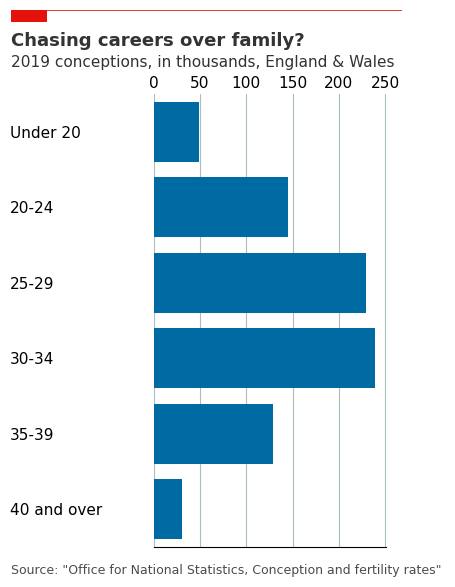

In [329]:
######################
## Conceptions 2019 ##
######################

# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
conceptions_bar = ts_data_filtered[ts_data_filtered['year'] == 2019].sort_values(by='age_group', ascending=False)

# Plot data
ax.barh(conceptions_bar['age_group'], conceptions_bar['nr_conceptions_thousands'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
ax.set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350, 400])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(conceptions_bar['age_group'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 5.5)

# Add in line and tag
ax.plot([-.35, 0.95],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="Chasing careers over family?", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2019 conceptions, in thousands, England & Wales", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "Office for National Statistics, Conception and fertility rates" """ , transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('conceptions_bar.png',         # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

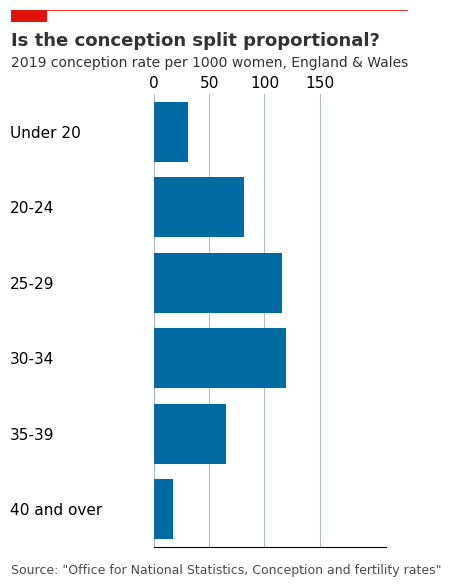

In [330]:
#######################################################
## Conceptions rate per 1000 women in 2019, by group ##
#######################################################

# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
conceptions_bar = ts_data_filtered[ts_data_filtered['year'] == 2019].sort_values(by='age_group', ascending=False)

# Plot data
ax.barh(conceptions_bar['age_group'], conceptions_bar['conception_rate1000_per_age_group'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 50, 100, 150])
ax.set_xticklabels([0, 50, 100, 150])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(conceptions_bar['age_group'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

ax.set_xlim(-0.5, 210.5)

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 5.5)

# Add in line and tag
ax.plot([-.35, 0.97],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="Is the conception split proportional?", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2019 conception rate per 1000 women, England & Wales", transform=fig.transFigure, ha='left', fontsize=10, alpha=.8, wrap=True)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "Office for National Statistics, Conception and fertility rates" """ , transform=fig.transFigure, ha='left', fontsize=9, alpha=.7, wrap=True)

# Export plot as high resolution PNG
plt.savefig('conceptions_rate_bar.png',         # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

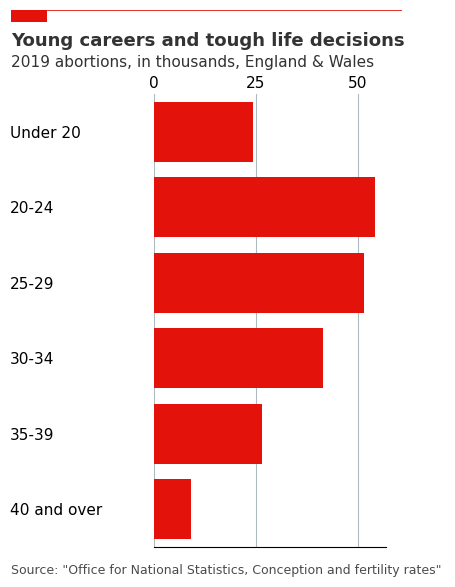

In [415]:
#################################
## Abortions in 2019, by group ##
#################################

# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
abortions_bar = ts_data_filtered[ts_data_filtered['year'] == 2019].sort_values(by='age_group', ascending=False)

# Plot data
ax.barh(abortions_bar['age_group'], abortions_bar['nr_abortions_thousands'], color='#E3120B', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 25, 50, 100, 150, 200, 250, 300, 350, 400])
ax.set_xticklabels([0, 25, 50, 100, 150, 200, 250, 300, 350, 400])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(abortions_bar['age_group'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 5.5)

# Add in line and tag
ax.plot([-.35, 0.95],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="Young careers and tough life decisions", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2019 abortions, in thousands, England & Wales", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "Office for National Statistics, Conception and fertility rates" """ , transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('abortions_bar.png',         # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

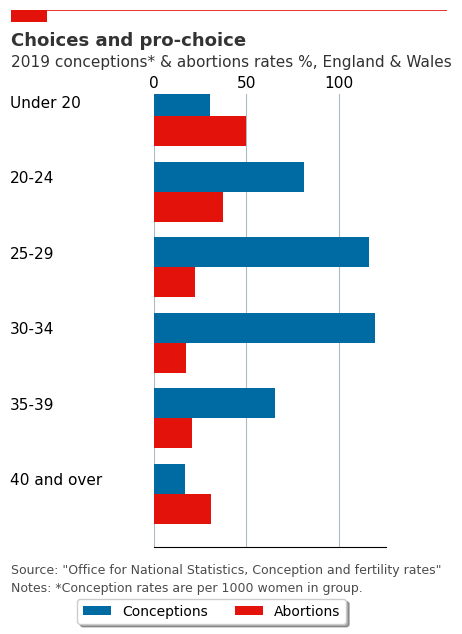

In [414]:
#################################
## Abortions in 2019, by group ##
#################################

# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
conceptions_bar = ts_data_filtered[ts_data_filtered['year'] == 2019].sort_values(by='age_group', ascending=False)
abortions_bar = ts_data_filtered[ts_data_filtered['year'] == 2019].sort_values(by='age_group', ascending=False)

# Plot data
ind = np.arange(len(conceptions_bar))
width = 0.4

ax.barh(ind+width, abortions_bar['conception_rate1000_per_age_group'], width, color='#006BA2', zorder=2, label='Conceptions')
ax.barh(ind, abortions_bar['abortion_rate'], width, color='#E3120B', zorder=2, label='Abortions')

ax.set(yticks=ind + width, yticklabels=abortions_bar['age_group'], ylim=[2*width - 1, len(conceptions_bar)])

ax.legend(loc='upper center', bbox_to_anchor=(0.25, -0.10),
          fancybox=True, shadow=True, ncol=2)


# Set custom labels for x-axis
ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
ax.set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350, 400])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(abortions_bar['age_group'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 5.5)

# Add in line and tag
ax.plot([-.35, 1.1],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="Choices and pro-choice", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2019 conceptions* & abortions rates %, England & Wales", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "Office for National Statistics, Conception and fertility rates" """ , transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
ax.text(x=-.35, y=.05, s="""Notes: *Conception rates are per 1000 women in group. """ , transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('joint_conceptions_abortions_bar.png',         # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

#### Timeline of evolution of conceptions and abortions over time

In [355]:
max(ts_data[ts_data['age_group'] == 'All ages']['nr_conceptions_thousands'])

909.245

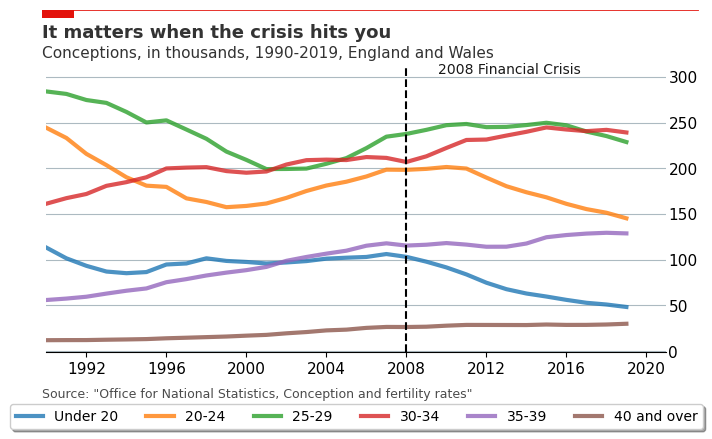

In [476]:
#########################################
## Conceptions timeline, by age groups ##
#########################################

# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Plot data
# Loop through age names and plot each one.
for age in ages:
    ax.plot(ts_data_filtered[ts_data_filtered['age_group'] == age]['year_dt'], 
            ts_data_filtered[ts_data_filtered['age_group'] == age]['nr_conceptions_thousands'], 
            #color='#758D99', 
            alpha=0.8, 
            linewidth=3,
            label=age)

plt.axvline(x=datetime.datetime(2008, 1, 1), ymax = 0.95, linestyle='dashed', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=6)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


# Set xlim to fit data without going over plot area
ax.set_xlim(pd.datetime(1990, 1, 1), pd.datetime(2021, 1, 1))

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

# Reformat y-axis tick labels
# ax.set_yticklabels(np.arange(0,300,5),        # Set labels again
#                    ha = 'right',                 # Set horizontal alignment to right
#                    verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline      

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 330)

# Add labels for 2008 financial crisis
ax.text(x=.615, y=.82, s="2008 Financial Crisis", transform=fig.transFigure, size=10, alpha=.9)

# Add in line and tag
ax.plot([0.12, 0.94],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#e3120b', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#e3120b', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.91, s="It matters when the crisis hits you", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Conceptions, in thousands, 1990-2019, England and Wales", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="""Source: "Office for National Statistics, Conception and fertility rates" """, transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('conceptions_line.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white


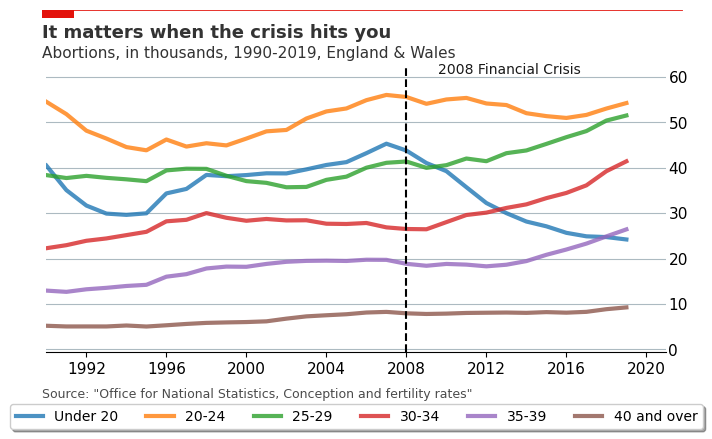

In [477]:
#########################################
## Abortions timeline, by age groups ##
#########################################

# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Plot data
# Loop through age names and plot each one.
for age in ages:
    ax.plot(ts_data_filtered[ts_data_filtered['age_group'] == age]['year_dt'], 
            ts_data_filtered[ts_data_filtered['age_group'] == age]['nr_abortions_thousands'], 
            #color='#758D99', 
            alpha=0.8, 
            linewidth=3,
            label=age)

plt.axvline(x=datetime.datetime(2008, 1, 1), ymax=0.95, linestyle='dashed', color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=6)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


# Set xlim to fit data without going over plot area
ax.set_xlim(pd.datetime(1990, 1, 1), pd.datetime(2021, 1, 1))

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

# Reformat y-axis tick labels
# ax.set_yticklabels(np.arange(0,61,10),        # Set labels again
#                    ha = 'right',                 # Set horizontal alignment to right
#                    verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline      

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 66)

# Add labels for 2008 financial crisis
ax.text(x=.615, y=.82, s="2008 Financial Crisis", transform=fig.transFigure, size=10, alpha=.9)

# Add in line and tag
ax.plot([0.12, 0.92],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#e3120b', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#e3120b', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.91, s="It matters when the crisis hits you", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Abortions, in thousands, 1990-2019, England & Wales", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="""Source: "Office for National Statistics, Conception and fertility rates" """, transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('abortions_line.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white


In [443]:
np.arange(0,61,10)

array([ 0, 10, 20, 30, 40, 50, 60])

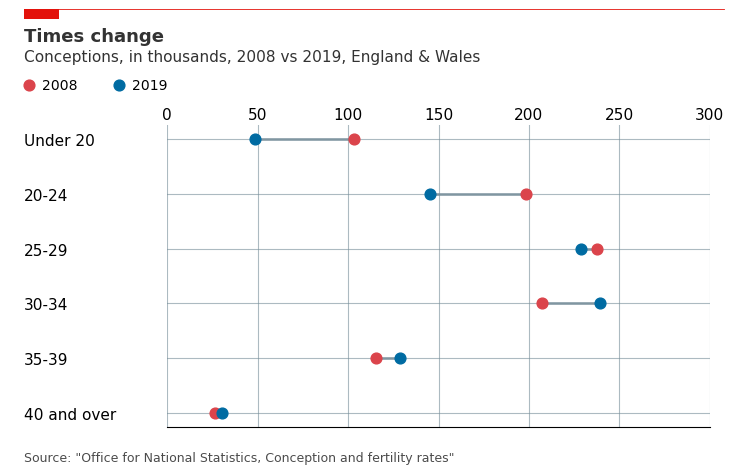

In [493]:
########################################
## Conceptions summary, by age groups ##
########################################

# Setup plot size.
fig, ax = plt.subplots(figsize=(7,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Setup data
conceptions_dumbbell = (ts_data_filtered[(ts_data_filtered['age_group'].isin(ages)) & ((ts_data_filtered['year'] == 2008) | (ts_data_filtered['year'] == 2019))][['year','nr_conceptions_thousands','age_group']]
                .pivot(index='age_group',columns='year', values='nr_conceptions_thousands')
                .sort_values(by='age_group', ascending=False))

# Plot data
# Plot horizontal lines first
ax.hlines(y=conceptions_dumbbell.index, xmin=conceptions_dumbbell[2008], xmax=conceptions_dumbbell[2019], color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)
# Plot bubbles next
ax.scatter(conceptions_dumbbell[2008], conceptions_dumbbell.index, label='2008', s=60, color='#DB444B', zorder=3)
ax.scatter(conceptions_dumbbell[2019], conceptions_dumbbell.index, label='2019', s=60, color='#006BA2', zorder=3)

# Set xlim
ax.set_xlim(0, 300.05)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(conceptions_dumbbell.index,       # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Set Legend
ax.legend(['2008', '2019'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)

# Add in line and tag
ax.plot([-0.08, .92],                 # Set width of line
        [1.17, 1.17],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-0.08,1.17),               # Set location of rectangle by lower left corder
                           0.05,                       # Width of rectangle
                           -0.025,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-0.08, y=1.09, s="Times change", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.08, y=1.04, s="Conceptions, in thousands, 2008 vs 2019, England & Wales", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.08, y=0.04, s="""Source: "Office for National Statistics, Conception and fertility rates" """, transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('conceptions_dumbbell.png',    # Set path and filename
            dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')                  # Set background color to white

### Part 4: Conclusions

In [ ]:
# Presentation